In [1]:
# # Code to read csv file into colaboratory:
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # 1. Authenticate and create the PyDrive client.
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [2]:
# downloaded = drive.CreateFile({'id':'1iJosm1f9YPo6EFZlPvlU0SN4BvhJQIfR'}) 
# downloaded.GetContentFile('clean_sentences.csv')


In [3]:
!pip install sklearn

You are using pip version 9.0.1, however version 9.0.3 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import numpy as np


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer

from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Model


from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, Input, MaxPooling1D, Convolution1D, Embedding
from keras.layers.merge import Concatenate

np.random.seed(0)

%matplotlib inline

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the re

In [4]:
clean_data = pd.read_csv("clean_sentences.csv")

In [5]:
df = pd.DataFrame(clean_data)

In [6]:
df.shape

(1600000, 2)

In [7]:
df.columns

Index(['Sentences', 'Label'], dtype='object')

In [8]:
np.sum(df.isnull().any(axis=1))

3373

In [9]:
df[df.isnull().any(axis=1)].head()

,Sentences,Label
208,NaN,0
249,NaN,0
398,NaN,0
430,NaN,0
1011,NaN,0


In [10]:
df = df.dropna()

In [11]:
df.shape

(1596627, 2)

In [12]:
np.sum(df.isnull().any(axis=1))

0

In [13]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [14]:
df.head()

,Sentences,Label
0,awww that bummer you shoulda got david carr of...,0
1,is upset that he can not update his facebook b...,0
2,dived many times for the ball managed to save ...,0
3,my whole body feels itchy and like its on fire,0
4,no it not behaving at all mad why am here beca...,0


In [15]:
df["Sentences"][1]

'is upset that he can not update his facebook by texting it and might cry as result school today also blah'

In [16]:
df["Label"].value_counts()

0    798467
1    798160
Name: Label, dtype: int64

In [17]:
X = df["Sentences"]
y = df["Label"]

In [18]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(1596627,)
(1596627,)


In [19]:
print("no. of classes :")
print(np.unique(y))

no. of classes :
[0 1]


In [20]:
# Summarize number of words
print("Number of words: ")
print(len(np.unique(np.hstack(X))))

Number of words: 
1519745


Sentence length: 
Mean 60.23 words (32.842545)


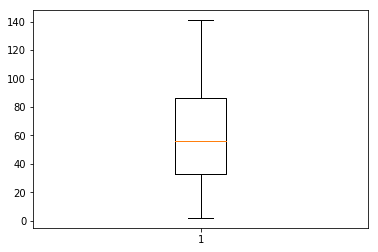

In [21]:
# Summarize sentence length
print("Sentence length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))
# plot review length
plt.boxplot(result)
plt.show()

In [22]:
from keras.preprocessing import sequence

Keras has provide very nice text processing functions.

Then we can format our text samples and labels into tensors that can be fed into a neural network. To do this, we will rely on Keras utilities keras.preprocessing.text.Tokenizer and keras.preprocessing.sequence.pad_sequences.

In [23]:
df = df.dropna()

In [24]:
x = df["Sentences"]
y = df["Label"]

In [25]:
from sklearn.cross_validation import train_test_split
SEED = 2000
x_train, x_validation_and_test, y_train, y_validation_and_test = train_test_split(x, y, test_size=.02, random_state=SEED)
x_validation, x_test, y_validation, y_test = train_test_split(x_validation_and_test, y_validation_and_test, test_size=.5, random_state=SEED)

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
tvec1 = TfidfVectorizer(max_features=100000,ngram_range=(1, 3))
tvec1.fit(x_train)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=100000, min_df=1,
        ngram_range=(1, 3), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [27]:
import pickle
#store the content
with open("tfidf_result.pkl", 'wb') as handle:
                    pickle.dump(tvec1, handle)


In [28]:
x_train_tfidf = tvec1.transform(x_train)

In [29]:
x_train_tfidf

<1564694x100000 sparse matrix of type '<class 'numpy.float64'>'
	with 29877303 stored elements in Compressed Sparse Row format>

In [30]:
x_validation_tfidf = tvec1.transform(x_validation).toarray()


In [31]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(x_train_tfidf, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [32]:
# y_train

In [33]:
clf.score(x_validation_tfidf, y_validation)

0.829575347613679

In [34]:
clf.score(x_train_tfidf, y_train)

0.8419857173351467

In [35]:
seed = 7
np.random.seed(seed)
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

In [36]:
from sklearn.preprocessing import Normalizer
norm = Normalizer().fit(x_train_tfidf)
x_train_tfidf_norm = norm.transform(x_train_tfidf)
x_validation_tfidf_norm = norm.transform(x_validation_tfidf)

In [37]:
def batch_generator(X_data, y_data, batch_size):
    samples_per_epoch = X_data.shape[0]
    number_of_batches = samples_per_epoch/batch_size
    counter=0
    index = np.arange(np.shape(y_data)[0])
    np.random.shuffle(index)
    while 1:
        index_batch = index[batch_size*counter:batch_size*(counter+1)]
        X_batch = X_data[index_batch,:].toarray()
        y_batch = y_data[y_data.index[index_batch]]
        counter += 1
        yield X_batch,y_batch
        if (counter > number_of_batches):
            np.random.shuffle(index)
            counter=0

In [38]:
x_train_tfidf.shape[0]

1564694

In [39]:
1564694/32

48896.6875

In [40]:
np.arange(np.shape(y_train)[0])

array([      0,       1,       2, ..., 1564691, 1564692, 1564693])

In [41]:
type(x_train_tfidf)

scipy.sparse.csr.csr_matrix

In [42]:
# %%time
# # custom_adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)

# from keras import optimizers

# custom_adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(64, activation='relu', input_dim=100000))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=5, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

In [43]:
# %%time
# from keras import optimizers
# custom_adam = optimizers.Adam(lr=0.0005, beta_1=0.9, beta_2=0.999, epsilon=1e-8)
# model = Sequential()
# model.add(Dense(128, activation='relu', input_dim=100000))
# model.add(Dropout(0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history = model.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=2, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/2
# 48897/48896 [==============================] - 1222s 25ms/step - loss: 0.4094 - acc: 0.8139 - val_loss: 0.3901 - val_acc: 0.8264
# Epoch 2/2
# 48897/48896 [==============================] - 1220s 25ms/step - loss: 0.3753 - acc: 0.8341 - val_loss: 0.3909 - val_acc: 0.8281
# CPU times: user 45min 41s, sys: 9min 53s, total: 55min 34s
# Wall time: 40min 43s

In [44]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(128, activation='relu', input_dim=100000))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=2, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)


# Epoch 1/2
# 48897/48896 [==============================] - 1206s 25ms/step - loss: 0.4085 - acc: 0.8137 - val_loss: 0.3884 - val_acc: 0.8283
# Epoch 2/2
# 48897/48896 [==============================] - 1206s 25ms/step - loss: 0.3719 - acc: 0.8353 - val_loss: 0.3883 - val_acc: 0.8281
# CPU times: user 45min 9s, sys: 9min 38s, total: 54min 48s
# Wall time: 40min 13s


In [45]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(128, activation='relu', input_dim=100000))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)


# Epoch 1/3
# 48897/48896 [==============================] - 1210s 25ms/step - loss: 0.4085 - acc: 0.8138 - val_loss: 0.3882 - val_acc: 0.8284
# Epoch 2/3
# 48897/48896 [==============================] - 1209s 25ms/step - loss: 0.3716 - acc: 0.8356 - val_loss: 0.3882 - val_acc: 0.8269
# Epoch 3/3
# 48897/48896 [==============================] - 1209s 25ms/step - loss: 0.3601 - acc: 0.8427 - val_loss: 0.3940 - val_acc: 0.8271
# CPU times: user 1h 7min 49s, sys: 14min 27s, total: 1h 22min 17s
# Wall time: 1h 29s

In [46]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(150, activation='relu', input_dim=100000))
# model_s.add(Dense(62, activation='relu'))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 1385s 28ms/step - loss: 0.4079 - acc: 0.8143 - val_loss: 0.3879 - val_acc: 0.8278
# Epoch 2/3
# 48897/48896 [==============================] - 1376s 28ms/step - loss: 0.3590 - acc: 0.8434 - val_loss: 0.3867 - val_acc: 0.8275
# Epoch 3/3
# 48897/48896 [==============================] - 1376s 28ms/step - loss: 0.3121 - acc: 0.8723 - val_loss: 0.4090 - val_acc: 0.8240
# CPU times: user 1h 13min 56s, sys: 16min 40s, total: 1h 30min 37s
# Wall time: 1h 8min 58s

In [50]:
# nn-model.h5
%%time
model_s = Sequential()
model_s.add(Dense(200, activation='relu', input_dim=100000))
model_s.add(Dense(100, activation='relu'))
model_s.add(Dropout(0.5))
model_s.add(Dense(50, activation='relu'))
model_s.add(Dense(10, activation='relu'))
model_s.add(Dense(1, activation='sigmoid'))
model_s.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
                    epochs=3, validation_data=(x_validation_tfidf, y_validation),
                    steps_per_epoch=x_train_tfidf.shape[0]/32)

# Epoch 1/3
# 48897/48896 [==============================] - 1724s 35ms/step - loss: 0.4120 - acc: 0.8132 - val_loss: 0.3998 - val_acc: 0.8268
# Epoch 2/3
# 48897/48896 [==============================] - 1715s 35ms/step - loss: 0.3643 - acc: 0.8415 - val_loss: 0.3902 - val_acc: 0.8276
# Epoch 3/3
# 48897/48896 [==============================] - 1717s 35ms/step - loss: 0.3259 - acc: 0.8674 - val_loss: 0.3952 - val_acc: 0.8238
# CPU times: user 1h 25min 8s, sys: 20min 55s, total: 1h 46min 4s
# Wall time: 1h 25min 57s


Epoch 1/3
48897/48896 [==============================] - 1724s 35ms/step - loss: 0.4120 - acc: 0.8132 - val_loss: 0.3998 - val_acc: 0.8268
Epoch 2/3
48897/48896 [==============================] - 1715s 35ms/step - loss: 0.3643 - acc: 0.8415 - val_loss: 0.3902 - val_acc: 0.8276
Epoch 3/3
48897/48896 [==============================] - 1717s 35ms/step - loss: 0.3259 - acc: 0.8674 - val_loss: 0.3952 - val_acc: 0.8238
CPU times: user 1h 25min 8s, sys: 20min 55s, total: 1h 46min 4s
Wall time: 1h 25min 57s


In [ ]:
# %%time
# model_s = Sequential()
# model_s.add(Dense(250, activation='relu', input_dim=100000))
# model_s.add(Dense(62, activation='relu'))
# model_s.add(Dense(1, activation='sigmoid'))
# model_s.compile(optimizer='adam',
#               loss='binary_crossentropy',
#               metrics=['accuracy'])

# history_s = model_s.fit_generator(generator=batch_generator(x_train_tfidf, y_train, 32),
#                     epochs=3, validation_data=(x_validation_tfidf, y_validation),
#                     steps_per_epoch=x_train_tfidf.shape[0]/32)

In [48]:
# plt.plot(history.history["loss"], label = "Train loss")
plt.plot(history.history["val_loss"], label = "Validation data loss", color='red')

NameError: name 'history' is not defined

In [2]:
from keras.models import load_model


/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [51]:

model_s.save('nn-model.h5')  # creates a HDF5 file 'my_model.h5'
# del model  # deletes the existing model

# returns a compiled model


In [3]:

# identical to the previous one
model = load_model('nn-model.h5')

In [ ]:
%%time
model.evaluate_generator(generator=batch_generator(x_train_tfidf, y_train, 32),steps=x_train_tfidf.shape[0]/32, 
                         max_queue_size=10, workers=1, use_multiprocessing=False)
# evaluate_generator(self, generator, steps=None, max_queue_size=10, workers=1, use_multiprocessing=False)




## Prediction

In [ ]:
x_test_tfidf = tvec1.transform(x_test).toarray()

In [ ]:
# pred = model.predict_generator(generator=batch_generator(x_test_tfidf, y_test, 32),steps=x_test_tfidf.shape[0]/32, max_queue_size=10, 
#                                workers=1, use_multiprocessing=False, verbose=1)

In [ ]:
pred = model.predict(x_test_tfidf, verbose=1)

In [ ]:
df_test_view = pd.DataFrame()
df_test_view["Sentences"] = x_test
df_test_view["real-y-values"] = y_test
df_test_view["Predictions"] = pred

In [ ]:
df_test_view.head(20)

In [ ]:
df_test_view[df_test_view["Predictions"] < 0.5].head(10)

In [ ]:
df_test_view[df_test_view["Predictions"] > 0.5].head(10)

## TEST

In [1]:
docs = ["I will not be able to come for your party, sorry"]

In [2]:
import time
import html
from nltk.tokenize import WordPunctTokenizer
import re

tok = WordPunctTokenizer()

mention1 = r'@[A-Za-z0-9]+'
mention2 = r'https?://[^ ]+'
combined_pat = r'|'.join((mention1, mention2))
www_pat = r'www.[^ ]+\.[^ ]+'
negations_dic = {"don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not", "wasn't":"was not", "weren't":"were not", "isn't":"is not", "aren't":"are not", 
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", }
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
combined_pattern = re.compile(combined_pat)
www_pattern = re.compile(www_pat)
letters_pattern = re.compile("[^a-zA-Z]")

In [3]:
def clean_sentence(lower, higher, texts):
  
  results = []
  start_time = time.time()
  
  for i in range(lower, higher):
    
    if (i - lower + 1) % 100000 == 0:
      end_time = time.time() - start_time
      print(i - lower + 1, "Sentences cleaned , time in seconds:", end_time)
      start_time = time.time()
    text = texts[i]
    html_unescaped = html.unescape(text)
    try:
        bom_removed = html_unescaped.decode("utf-8-sig").replace(u"\ufffd", "?")
    except:
        bom_removed = html_unescaped
    stripped = combined_pattern.sub('', bom_removed)
    stripped = www_pattern.sub('', stripped)
    lower_case = stripped.lower()
    words = [negations_dic[x] if x in negations_dic else x for x in lower_case.split(' ')]
    neg_handled = " ".join(words).strip()
    letters_only = letters_pattern.sub(" ", neg_handled)
    words = [x for x  in tok.tokenize(letters_only) if len(x) > 1]
    results.append(" ".join(words).strip())
    
  return results

In [4]:
print("Sentence Cleaning........\n")
# clean_Sentences_test = []
# clean_Sentences_test.extend(clean_sentence(0, len(docs), docs))
clean_doc = clean_sentence(0, len(docs), docs)
print("\nSentence Cleaning Completed........\n")

Sentence Cleaning........


Sentence Cleaning Completed........



In [5]:
clean_doc

['will not be able to come for your party sorry']

In [6]:
import pickle
#load the content
tfidf = pickle.load(open("tfidf_result.pkl", "rb" ) )

In [7]:
# pred_sentence = tvec1.transform(clean_doc).toarray()
pred_sentence = tfidf.transform(clean_doc).toarray()


In [8]:
pred_sentence.shape

(1, 100000)

In [9]:
from keras.models import load_model
# loading the modelfrom keras.models import load_model

model1 = load_model('nn-model.h5')

/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #2
  (fname, cnt))
/home/ubuntu/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/matplotlib/__init__.py:962: UserWarning: Duplicate key in file "/home/ubuntu/.config/matplotlib/matplotlibrc", line #3
  (fname, cnt))


In [11]:
pred = model1.predict(pred_sentence, verbose=1)

1/1 [==============================] - 0s 168ms/step


In [17]:
pred

array([[0.12622079]], dtype=float32)

In [13]:
type(pred)

numpy.ndarray

In [15]:
type(pred[0])

numpy.ndarray

In [14]:
pred[0][0]

0.12622079

Reading links : 

1. https://nlp.stanford.edu/projects/glove/


In [1]:
pred = [[0.12622079]]

In [3]:
pred[0][0]

0.12622079